In [1]:
import numpy as np 
import pandas as pd

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

abcnews-date-text.csv



In [2]:
df = pd.read_csv("../input/abcnews-date-text.csv")
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [3]:
df.dtypes

publish_date      int64
headline_text    object
dtype: object

 In order to add a column, "Year" I need the following:
 
 Convert the data type (dtype) to string (str) using astype.
 
 Then used vectorised str method to slice the string and then convert back to int64 dtype again.

In [4]:
df["year"] = df["publish_date"].astype(str).str[:4].astype(np.int64)
df.head()

,publish_date,headline_text,year
0,20030219,aba decides against community broadcasting lic...,2003
1,20030219,act fire witnesses must be aware of defamation,2003
2,20030219,a g calls for infrastructure protection summit,2003
3,20030219,air nz staff in aust strike for pay rise,2003
4,20030219,air nz strike to affect australian travellers,2003


I can also add a "month" column:

In [5]:
df["month"] = df["publish_date"].astype(str).str[4:6].astype(np.int64)
df.head()

,publish_date,headline_text,year,month
0,20030219,aba decides against community broadcasting lic...,2003,2
1,20030219,act fire witnesses must be aware of defamation,2003,2
2,20030219,a g calls for infrastructure protection summit,2003,2
3,20030219,air nz staff in aust strike for pay rise,2003,2
4,20030219,air nz strike to affect australian travellers,2003,2


Making sure all "Years" and "Months" are correct:

In [6]:
df.year.unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017])

In [7]:
df.month.unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1])

Add another column, Word_Count:

In [8]:
df["word_count"] = df["headline_text"].str.len()
df.head()

,publish_date,headline_text,year,month,word_count
0,20030219,aba decides against community broadcasting lic...,2003,2,50
1,20030219,act fire witnesses must be aware of defamation,2003,2,46
2,20030219,a g calls for infrastructure protection summit,2003,2,46
3,20030219,air nz staff in aust strike for pay rise,2003,2,40
4,20030219,air nz strike to affect australian travellers,2003,2,45


## Number of Articles per year:

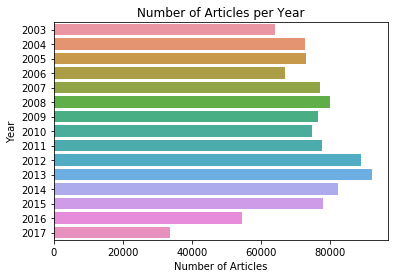

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

with sns.color_palette("GnBu_d", 10):
    ax= sns.countplot(y="year",data=df)
    ax.set(xlabel='Number of Articles', ylabel='Year')
plt.title("Number of Articles per Year")

In [10]:
df["headline_text"][0]

'aba decides against community broadcasting licence'

Remove words that don't carry much meaning: such words are called "stop words"(such as "a", "and", "is", and "the")

In [11]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [12]:
# Remove stop words from "words"

words = [w for w in words if not w in stopwords.words("english")]
words

NameError: name 'words' is not defined

In [13]:
df.shape

(1093281, 5)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = "english",   
                             max_features = 30)

news_array = vectorizer.fit_transform(df["headline_text"])

# Numpy arrays are easy to work with, so convert the result to an array
news_array = news_array.toarray()

# Lets take a look at the words in the vocabulary and  print the counts of each word in the vocabulary:
vocab = vectorizer.get_feature_names()

# Sum up the counts of each vocabulary word
dist = np.sum(news_array, axis=0)

# For each, print the vocabulary word and the number of times it appears in the training set
for tag, count in zip(vocab, dist):
    print (count, tag)

12427 australia
10148 australian
8309 calls
8599 car
10059 charged
8332 coast
16312 council
16194 court
11103 crash
8694 day
11053 death
16928 govt
10291 health
8761 hospital
14979 interview
27858 man
9105 murder
28756 new
12765 nsw
12260 plan
35706 police
11680 qld
9515 report
9015 sa
19683 says
10582 sydney
11389 wa
11837 water
8246 win
8232 woman
